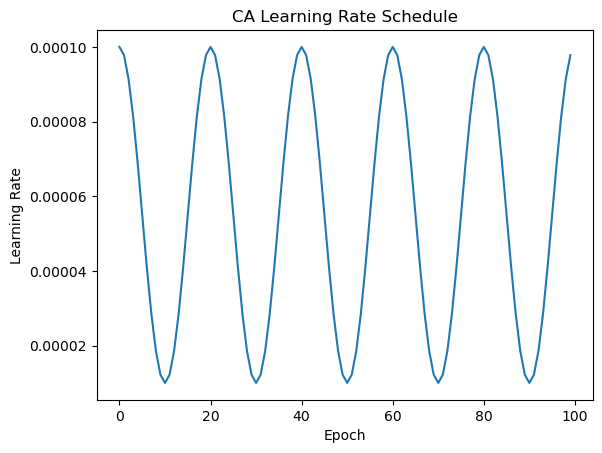

In [6]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR

def visualize_lr(lr_min, lr_max, t_max, epochs, last_epoch=-1):
    net = nn.Linear(10, 1)
    optimizer = optim.SGD(net.parameters(), lr=lr_max)

    scheduler = CosineAnnealingLR(optimizer, T_max=t_max, eta_min=lr_min, last_epoch=last_epoch)

    lr_values = []
    for epoch in range(epochs):
        lr = scheduler.get_last_lr()[0]
        lr_values.append(lr)
        optimizer.step()
        scheduler.step()

    plt.plot(range(epochs), lr_values)
    plt.title('CA Learning Rate Schedule')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.show()  

visualize_lr(lr_min=0.00001, lr_max=0.0001, t_max=10, epochs=100, last_epoch=-1)